In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [4]:
data = pd.read_csv('Advertising.csv',index_col=0)
print(data.head())
data.columns = ['TV','Radio','Newspaper','Sales']

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [4]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

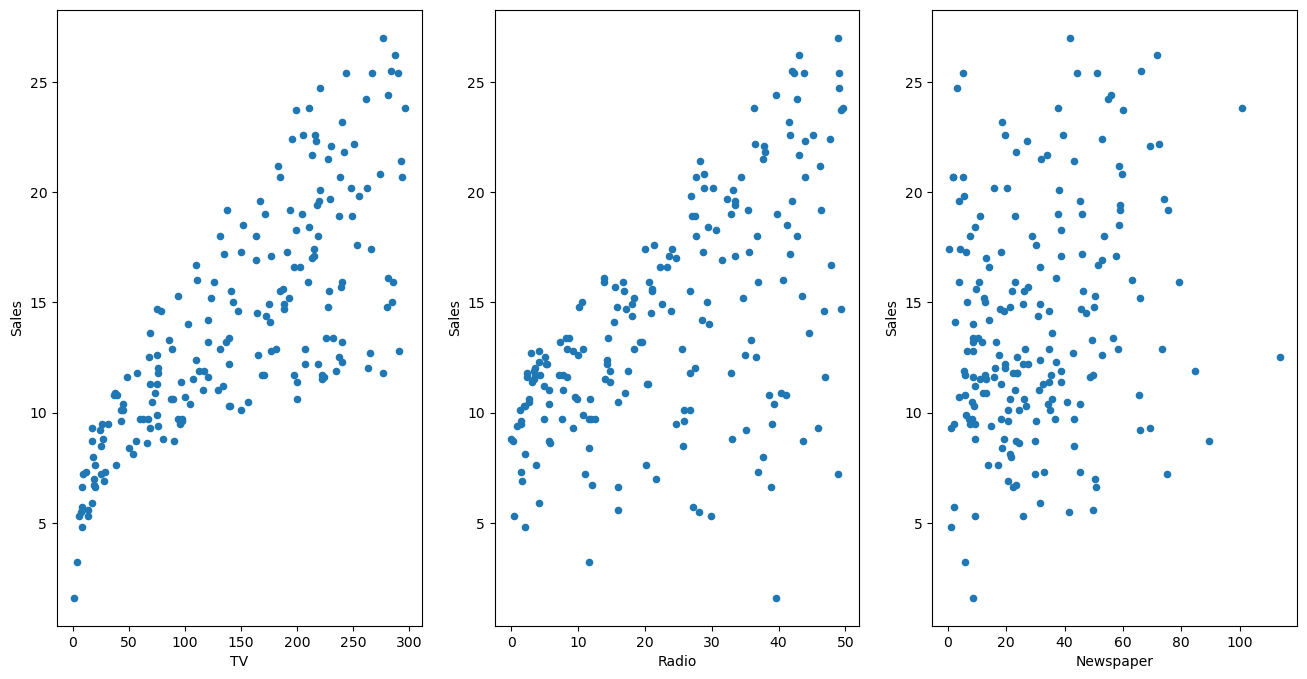

In [5]:
fig,axs = plt.subplots(1,3)
data.plot(kind = 'scatter', x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind = 'scatter', x='Radio',y='Sales',ax=axs[1])
data.plot(kind = 'scatter', x='Newspaper',y='Sales',ax=axs[2])

In [6]:
feature_cols = ['Radio']
x = data[feature_cols]
y = data.Sales

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [8]:
print(lm.intercept_)
print(lm.coef_)

9.311638095158283
[0.20249578]


In [9]:
9.3116381+0.2025*50

19.4366381

In [10]:
X_new = pd.DataFrame({'Radio':[50]})
X_new.head()

,Radio
0,50


In [11]:
lm.predict(X_new)

array([19.43642726])

In [12]:
X_new = pd.DataFrame({'Radio': [data.Radio.min(),data.Radio.max()]})
X_new.head()

,Radio
0,0.0
1,49.6


In [13]:
pred = lm.predict(X_new)
pred

array([ 9.3116381 , 19.35542895])

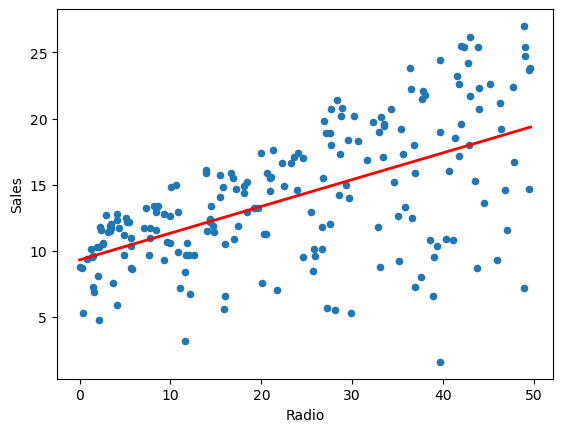

In [14]:
data.plot(kind='scatter',x='Radio',y='Sales')
plt.plot(X_new,pred,c='red',linewidth=2)

In [15]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ Radio',data=data).fit()

In [16]:
lm.conf_int()

,0,1
Intercept,8.201588,10.421688
Radio,0.162244,0.242747


In [17]:
lm.pvalues

Intercept    3.561071e-39
Radio        4.354966e-19
dtype: float64

In [18]:
lm.rsquared

0.33203245544529536

In [19]:
#How can we evalutae that is it good r squared value based on one feature
#So we use mulitple linear regression to compare different model  
#It takes all the independent variable cosiders as feature of the model
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales

from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
lm = LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [21]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [22]:
print(lm.intercept_)
print(lm.coef_)

predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,predictions)))

2.7089490925159048
[0.04405928 0.1992875  0.00688245]
1.9485372043446383


In [23]:
lm = smf.ols(formula='Sales~TV + Radio + Newspaper',data = data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        11:53:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm = smf.ols(formula='Sales~TV+Radio',data=data).fit()
lm.rsquared

0.8971942610828956

In [25]:
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums>0.5
data['Size'] = 'small'
data.loc[mask_large,'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [26]:
data['IsLarge'] = data.Size.map({'small':0,'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [27]:
feature_cols = ['TV','Radio','Newspaper','IsLarge']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)
zip(feature_cols,lm.coef_)
#from sklearn import model_selection
#xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

2.9117013282568607
[ 0.04571982  0.18872814 -0.00109768  0.05742385]


In [28]:
np.random.seed(123456)

nums = np.random.rand(len(data))
mask_suburban = ((nums>0.33) & (nums<0.66))
mask_urban = nums > 0.66
data['Area']='rural'
data.loc[mask_suburban,'Area']='suburban'
data.loc[mask_urban,'Area']='urban'
print(data)

        TV  Radio  Newspaper  Sales   Size  IsLarge      Area
1    230.1   37.8       69.2   22.1  large        1     rural
2     44.5   39.3       45.1   10.4  small        0     urban
3     17.2   45.9       69.3    9.3  small        0     rural
4    151.5   41.3       58.5   18.5  small        0     urban
5    180.8   10.8       58.4   12.9  large        1  suburban
..     ...    ...        ...    ...    ...      ...       ...
196   38.2    3.7       13.8    7.6  small        0  suburban
197   94.2    4.9        8.1    9.7  small        0     urban
198  177.0    9.3        6.4   12.8  small        0  suburban
199  283.6   42.0       66.2   25.5  small        0     rural
200  232.1    8.6        8.7   13.4  large        1     rural

[200 rows x 7 columns]


In [29]:
area_dummies = pd.get_dummies(data.Area,prefix='Area').iloc[:,1:]

data = pd.concat([data,area_dummies],axis=1)
print(data)

        TV  Radio  Newspaper  Sales   Size  IsLarge      Area  Area_suburban  \
1    230.1   37.8       69.2   22.1  large        1     rural              0   
2     44.5   39.3       45.1   10.4  small        0     urban              0   
3     17.2   45.9       69.3    9.3  small        0     rural              0   
4    151.5   41.3       58.5   18.5  small        0     urban              0   
5    180.8   10.8       58.4   12.9  large        1  suburban              1   
..     ...    ...        ...    ...    ...      ...       ...            ...   
196   38.2    3.7       13.8    7.6  small        0  suburban              1   
197   94.2    4.9        8.1    9.7  small        0     urban              0   
198  177.0    9.3        6.4   12.8  small        0  suburban              1   
199  283.6   42.0       66.2   25.5  small        0     rural              0   
200  232.1    8.6        8.7   13.4  large        1     rural              0   

     Area_urban  
1             0  
2  

In [31]:
feature_cols = ['TV','Radio','Newspaper','IsLarge','Area_suburban','Area_urban']
X = data[feature_cols]
y = data.Sales
print(X)
lm = LinearRegression()
lm.fit(X,y)
print(feature_cols,lm.coef_)

        TV  Radio  Newspaper  IsLarge  Area_suburban  Area_urban
1    230.1   37.8       69.2        1              0           0
2     44.5   39.3       45.1        0              0           1
3     17.2   45.9       69.3        0              0           0
4    151.5   41.3       58.5        0              0           1
5    180.8   10.8       58.4        1              1           0
..     ...    ...        ...      ...            ...         ...
196   38.2    3.7       13.8        0              1           0
197   94.2    4.9        8.1        0              0           1
198  177.0    9.3        6.4        0              1           0
199  283.6   42.0       66.2        0              0           0
200  232.1    8.6        8.7        1              0           0

[200 rows x 6 columns]
['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
